# Поиска инсайтов и точек роста

С данными сервиса доставки еды «Всё.из.кафе» вы уже работали в одном из проектов базового курса. Тогда вы описывали ключевые метрики продукта — количество пользователей, заказов и выручку.

Однако конкуренты сервиса не дремлют, и руководство ждёт от продукта роста. Найти инсайты, которые позволят сервису повысить показатель удержания пользователей и улучшить взаимодействие с партнёрами, поручено продуктовому аналитику, то есть вам.

Вам необходимо помочь бизнесу ответить на следующие вопросы:
- Как ведут себя пользователи? Как наиболее эффективно выстроить работу с ними, чтобы они продолжали пользоваться продуктом?
- Какой путь проходят пользователи в сервисе? Где «проваливаются»?
- Как улучшить взаимодействие с партнёрами-ресторанами?

### Задачи 

В рамках данного проекта вы проведёте комплексный анализ данных:
- изучите пользовательский путь и проанализируете конверсии через воронки;
- сегментируете пользователей с помощью RFM-модели для оценки лояльности и поведения клиентов;
- кластеризуете рестораны методом K-Means, чтобы выделить группы с разными моделями работы и разработать персонализированные маркетинговые стратегии.

Такой подход позволит ближе познакомиться с работой сервиса, выявить узкие места и предложить решения для удержания пользователей и повышения эффективности сотрудничества с ресторанами.


### Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

    
### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

## 1. Загрузка данных и их предобработка

Загрузите данные и получите первую информацию о них. Проведите необходимую предобработку. Основную информацию о данных и этапы предобработки зафиксируйте в кратком промежуточном выводе.

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/insides_data.csv')

In [4]:
df.head()

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


In [5]:
print('Количество пропусков в каждом столбце в абсолютных значениях')
print(df.isna().sum())
print('Количество пропусков в каждом столбце в долях')
print(df.isna().mean())
         
tmp = df.copy()
missing = pd.DataFrame({
        'Кол-во пропусков': tmp.isna().sum(),
        'Доля пропусков': tmp.isna().mean().round(4)
    }).style.background_gradient(cmap='coolwarm')
    
display(missing)    

Количество пропусков в каждом столбце в абсолютных значениях
visitor_uuid         0
user_id              0
device_type          0
city_id              0
source               0
first_date           0
visit_id             0
event                0
datetime             0
rest_id          38595
object_id       184202
order_id        198502
revenue         198502
delivery        198502
commission      184202
dtype: int64
Количество пропусков в каждом столбце в долях
visitor_uuid    0.000000
user_id         0.000000
device_type     0.000000
city_id         0.000000
source          0.000000
first_date      0.000000
visit_id        0.000000
event           0.000000
datetime        0.000000
rest_id         0.187801
object_id       0.896316
order_id        0.965899
revenue         0.965899
delivery        0.965899
commission      0.896316
dtype: float64


,Кол-во пропусков,Доля пропусков
visitor_uuid,0,0.000000
user_id,0,0.000000
device_type,0,0.000000
city_id,0,0.000000
source,0,0.000000
first_date,0,0.000000
visit_id,0,0.000000
event,0,0.000000
datetime,0,0.000000
rest_id,38595,0.187800


In [6]:
print(f'Количество полных дубликатов в датафрейме:')
print(df.duplicated().sum())

Количество полных дубликатов в датафрейме:
0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   visitor_uuid  205510 non-null  object 
 1   user_id       205510 non-null  float64
 2   device_type   205510 non-null  object 
 3   city_id       205510 non-null  int64  
 4   source        205510 non-null  object 
 5   first_date    205510 non-null  object 
 6   visit_id      205510 non-null  int64  
 7   event         205510 non-null  object 
 8   datetime      205510 non-null  object 
 9   rest_id       166915 non-null  object 
 10  object_id     21308 non-null   float64
 11  order_id      7008 non-null    float64
 12  revenue       7008 non-null    float64
 13  delivery      7008 non-null    float64
 14  commission    21308 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 23.5+ MB


In [8]:
df['date'] = pd.to_datetime(df['datetime']).dt.date
df['date'] = pd.to_datetime(df['date'])

In [9]:
min_dt = df['datetime'].min()
max_dt = df['datetime'].max()
print(f'Данные относятся к диапазону дат: {min_dt} - {max_dt}')

Данные относятся к диапазону дат: 2021-05-01 00:10:55 - 2021-07-02 00:12:08


In [10]:
#df = df[df['datetime'] < '2021-07-01 00:00:00']

In [11]:
print('Уникальные значения для event:')
print(df['event'].unique())

Уникальные значения для event:
['authorization' 'reg_page' 'confirm_phone' 'login' 'main_page'
 'object_page' 'add_to_cart' 'order']


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   visitor_uuid  205510 non-null  object        
 1   user_id       205510 non-null  float64       
 2   device_type   205510 non-null  object        
 3   city_id       205510 non-null  int64         
 4   source        205510 non-null  object        
 5   first_date    205510 non-null  object        
 6   visit_id      205510 non-null  int64         
 7   event         205510 non-null  object        
 8   datetime      205510 non-null  object        
 9   rest_id       166915 non-null  object        
 10  object_id     21308 non-null   float64       
 11  order_id      7008 non-null    float64       
 12  revenue       7008 non-null    float64       
 13  delivery      7008 non-null    float64       
 14  commission    21308 non-null   float64       
 15  date          205

### Промежуточные выводы:
1) Пропуски содержатся в следующих колонка и их доля составляет:
- rest_id (индентификатор ресторана) 18% 
- object_id (индентификатор блюда) 89.6%
- order_id (индентификатор заказа) 96.6% 
- revenue (выручка) 96.6%
- delivery (стоимость доставки) 96.6%
- comission (комиссия с ресторана) 89.6% <br>
Данные пропуски скорее всего связаны с тем, что данный датасет был получен объединением трех таблиц 
2) Полных дубликатов в данных не обнаружено
3) Из данных datetime выделена дата и приведена к типу данных datetime
4) Диапазон дат: от 2021-05-01 до 2021-07-02. 

---

## 2. Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

С помощью воронок изучите общий пользовательский путь новых пользователей, затем сравните поведение пользователей мобильной и десктопной версий приложения. 

**Задача 2.1.** Постройте и визуализируйте общую воронку (по всем данным), затем опишите пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.
    
При решении постройте две воронки: 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

In [13]:
funnel_steps = ['authorization', 'main_page', 'reg_page', 'confirm_phone', 'object_page', 'add_to_cart', 'order']
funnel_df_steps = df[df['event'].isin(funnel_steps)]
funnel_counts = funnel_df_steps.groupby('event')['user_id'].nunique().reindex(funnel_steps)
funnel_df = pd.DataFrame({
    'step': funnel_steps,
    'users': funnel_counts.values})
funnel_df['conversion_from_first_%'] = round((funnel_df['users'] / funnel_df['users'].iloc[0]) * 100, 1)
funnel_df['conversion_from_previous_%'] = round((funnel_df['users'] / funnel_df['users'].shift(1)) * 100, 1) 
print(funnel_df.head(7))

            step  users  conversion_from_first_%  conversion_from_previous_%
0  authorization   7410                    100.0                         NaN
1      main_page   6537                     88.2                        88.2
2       reg_page   5417                     73.1                        82.9
3  confirm_phone   4190                     56.5                        77.3
4    object_page   3453                     46.6                        82.4
5    add_to_cart   2899                     39.1                        84.0
6          order   2416                     32.6                        83.3


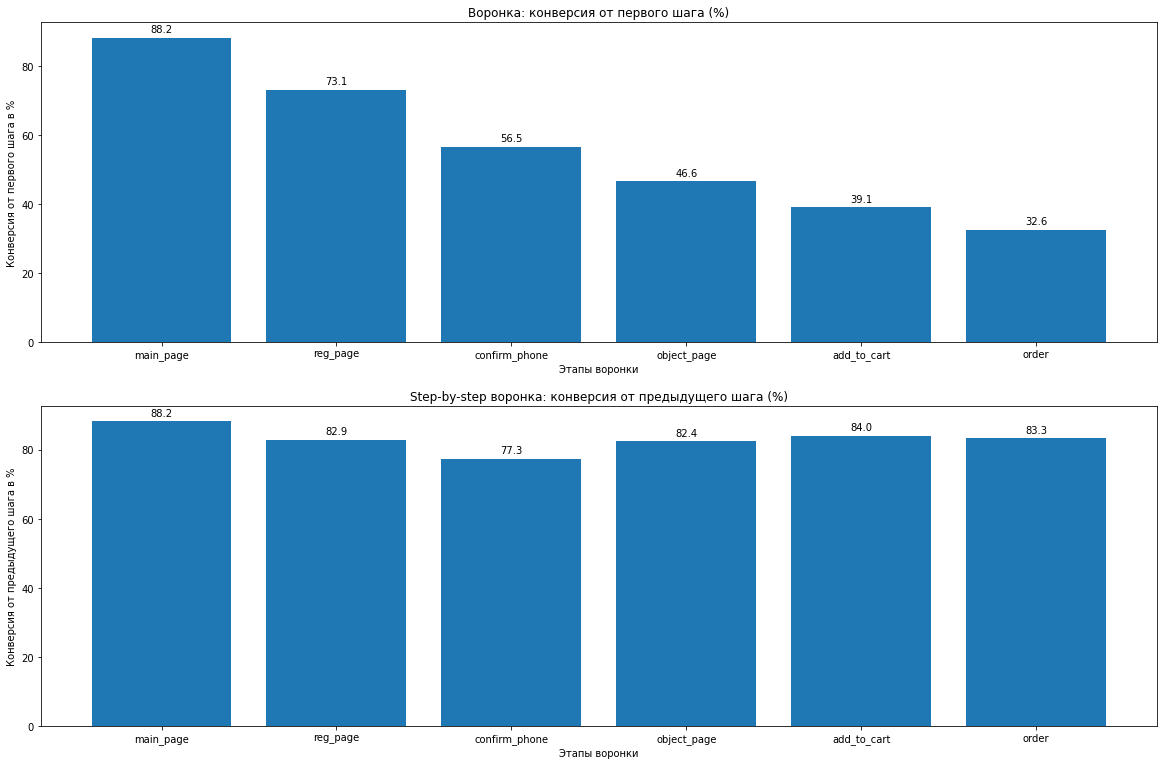

In [14]:
plt.figure(figsize = (20, 20))

plt.subplot(3, 1, 1)
bars = plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_first_%'][1:])
plt.title('Воронка: конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия от первого шага в %')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=10
        )

plt.subplot(3, 1, 2)

bars = plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:])

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=10
        )

plt.title('Step-by-step воронка: конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия от предыдущего шага в %')

plt.show()

### Промежуточные выводы
- Часть пользователей (12%) теряется после авторизации
- Узкое место в воронке - переход от страницы регистрации до подверждения телефона. на этоп этапе теряется почти 23% пользователей
- На остальных этапах теряется 16-18% пользователей
- До целевого действия (заказа) доходит только 33% пользователей

**Задача 2.2.** Сравните пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого постройте и визуализируйте **две воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.
    
Сравните результаты между собой и проанализируйте, есть ли различия в пользовательском пути для различных приложений. Результаты сравнения опишите в небольшом **промежуточном выводе**.

In [15]:
mobile_df = df[df['device_type'] == 'Mobile']
desktop_df = df[df['device_type'] == 'Desktop']

mobile_df_steps = mobile_df[mobile_df['event'].isin(funnel_steps)]
mobile_counts = mobile_df_steps.groupby('event')['user_id'].nunique().reindex(funnel_steps)
mobile_funnel = round((mobile_counts / mobile_counts.shift(1) * 100), 1)

desktop_df_steps = desktop_df[desktop_df['event'].isin(funnel_steps)]
desktop_counts = desktop_df_steps.groupby('event')['user_id'].nunique().reindex(funnel_steps)
desktop_funnel = round((desktop_counts / desktop_counts.shift(1) * 100), 1)


funnel_device = pd.DataFrame({
    'step': funnel_steps[1:],
    'users_mobile': mobile_funnel[1:].values,
    'users_desktop': desktop_funnel[1:].values})
 
print(funnel_device.head(7))

            step  users_mobile  users_desktop
0      main_page          83.3           91.1
1       reg_page          88.4           79.4
2  confirm_phone          55.1           90.2
3    object_page          72.5           85.8
4    add_to_cart          86.7           82.9
5          order          85.8           82.3


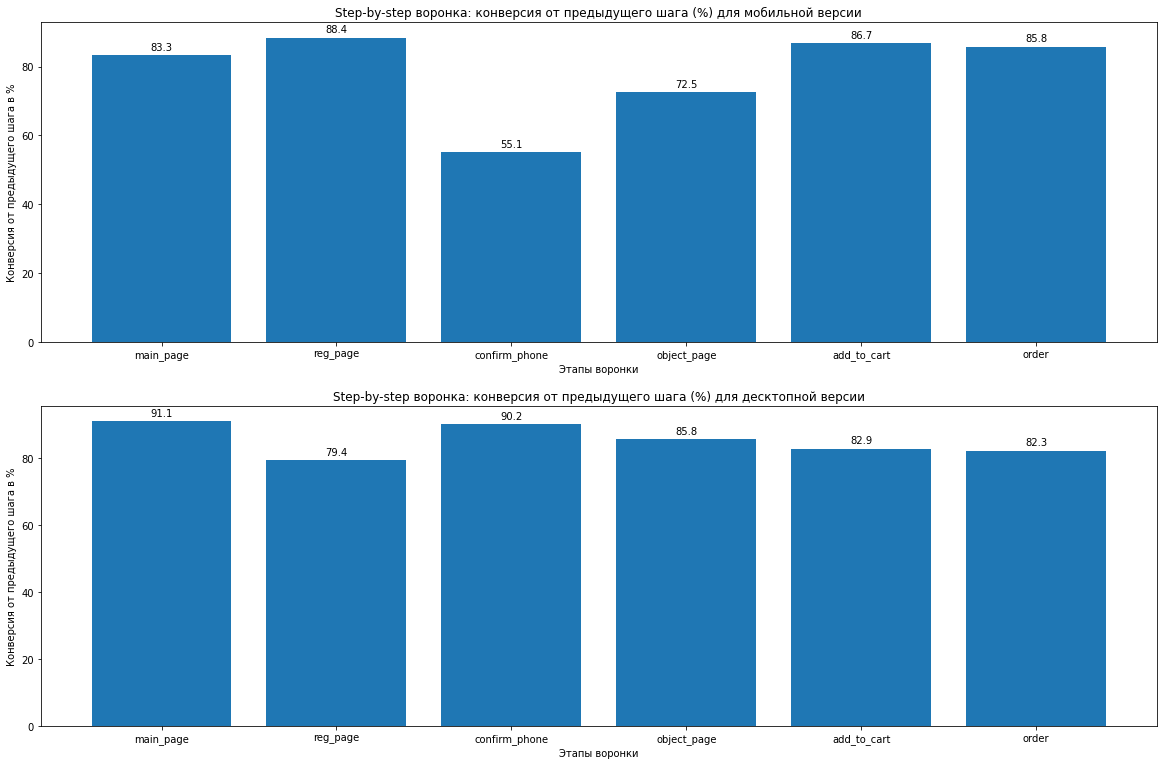

In [16]:
plt.figure(figsize = (20, 20))

plt.subplot(3, 1, 1)
bars = plt.bar(funnel_device['step'], funnel_device['users_mobile'])
plt.title('Step-by-step воронка: конверсия от предыдущего шага (%) для мобильной версии')
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия от предыдущего шага в %')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=10
        )

plt.subplot(3, 1, 2)
bars = plt.bar(funnel_device['step'], funnel_device['users_desktop'])
plt.title('Step-by-step воронка: конверсия от предыдущего шага (%) для десктопной версии')
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия от предыдущего шага в %')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=10
        )

plt.show()

### Промежуточные выводы
- Основная потеря мобильной аудитории (на ~45%) происходит между страницей регистрации и подтверждением телефона. 
- В отличие от мобильной версии, для десктопной версии наблюдается равномерная потеря пользователей, на 10-17% между этапами.

---

## 3. RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям: 
- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установите **03 июля 2021 года**.

**Задача 3.1.** Для каждого покупателя посчитайте:
- количество дней с последней покупки — давность (R);
- частоту покупок (F);
- стоимость всех покупок — сумму трат (M).
    
В качестве даты анализа установите **03 июля 2021 года**. После этого постройте три гистограммы и проанализируйте их.

In [17]:
orders = df[df['event'] == 'order']
orders['order_recency'] = pd.to_datetime('2021-07-03') - orders['date']

orders_rfm = orders.groupby('user_id').agg(
    recency = ('order_recency', lambda x: x.min().days),
    frequency = ('datetime', 'count'),
    monetary = ('revenue', 'sum')
).reset_index()

print(orders_rfm.head())

/tmp/ipykernel_109/1250784901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_recency'] = pd.to_datetime('2021-07-03') - orders['date']


   user_id  recency  frequency  monetary
0   5506.0       33          2   3752.00
1   6291.0       58          1   1750.00
2   6820.0       42          1   1260.14
3  11062.0       58          1   3785.60
4  13254.0       55          1    553.00


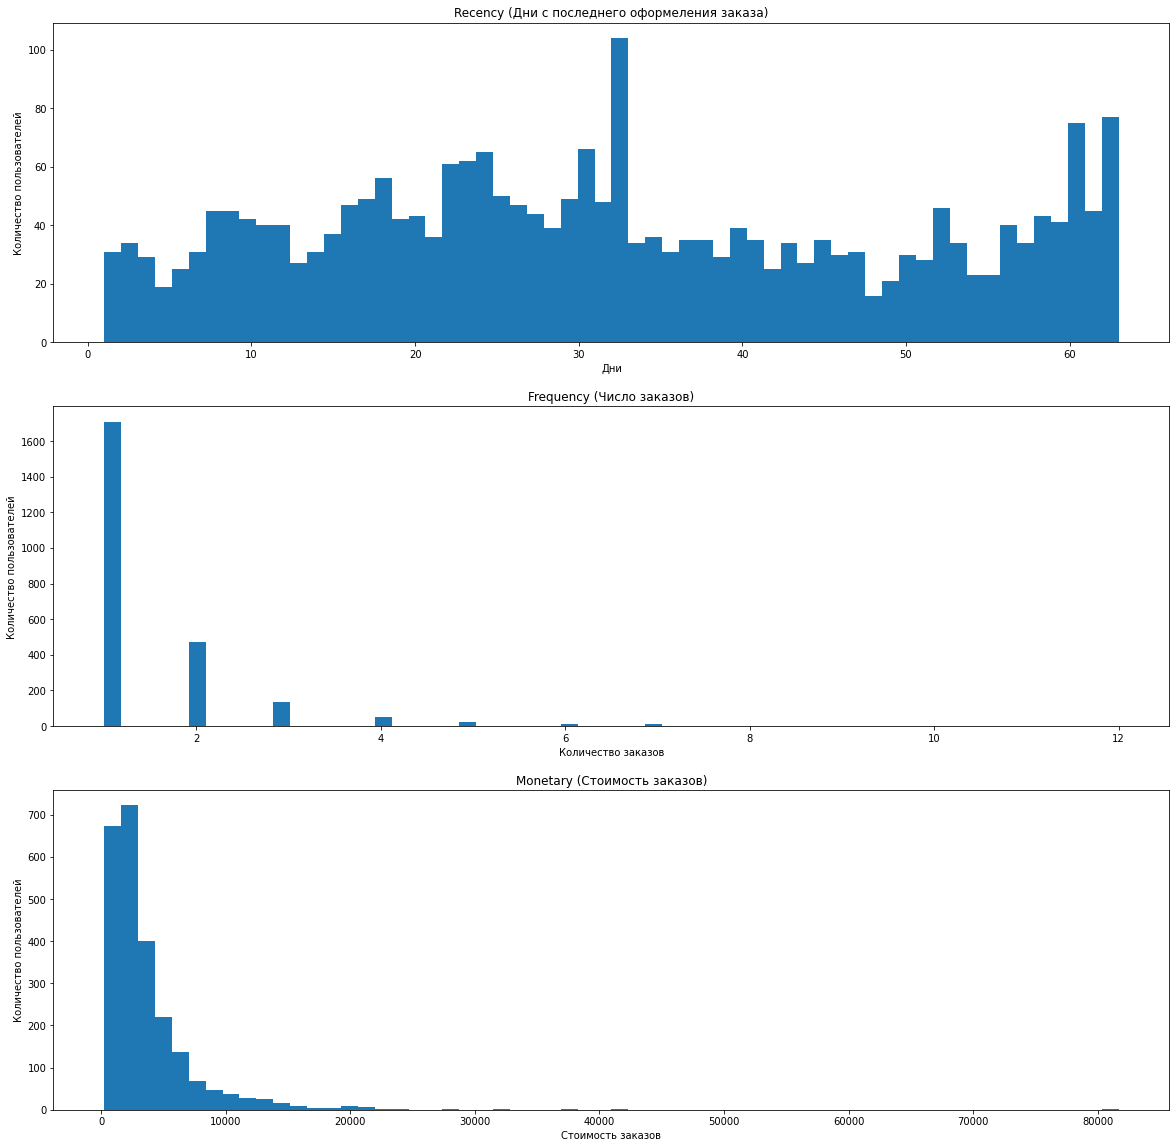

In [18]:
fig, axes = plt.subplots(3, 1, figsize = (20, 20))

axes[0].hist(orders_rfm['recency'], bins = 60)
axes[0].set_title('Recency (Дни с последнего оформеления заказа)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

axes[1].hist(orders_rfm['frequency'], bins = 60)
axes[1].set_title('Frequency (Число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

axes[2].hist(orders_rfm['monetary'], bins = 60)
axes[2].set_title('Monetary (Стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')

plt.show()

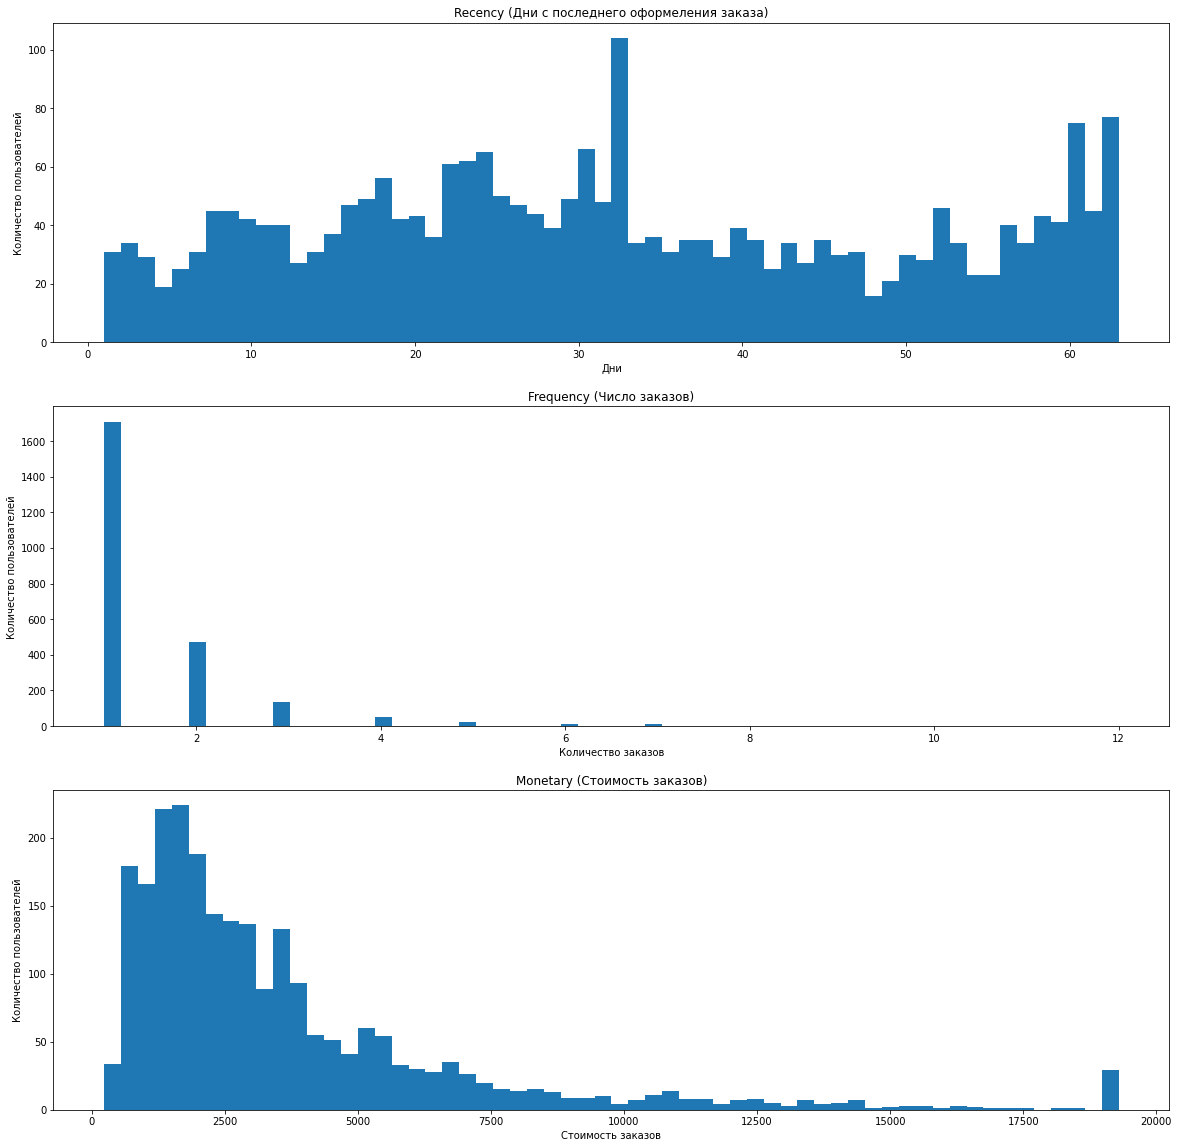

In [19]:
fig, axes = plt.subplots(3, 1, figsize = (20, 20))

axes[0].hist(orders_rfm['recency'], bins = 60)
axes[0].set_title('Recency (Дни с последнего оформеления заказа)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

axes[1].hist(orders_rfm['frequency'], bins = 60)
axes[1].set_title('Frequency (Число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

quantile_99 = orders_rfm['monetary'].quantile(0.99)

orders_rfm['monetary_99'] = orders_rfm['monetary'].apply(
    lambda x: x if x < quantile_99 else quantile_99
    )

axes[2].hist(orders_rfm['monetary_99'], bins = 60)
axes[2].set_title('Monetary (Стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')

plt.show()

### Промежуточные выводы
1) Recency: варьируется в широком диапазоне от 1 до 65 без смещения. Разделим данные на равные интервалы.
2) Frequency: варьируется в диапазоне от 1 до 8, но преобладают пользователи с небольшим количеством заказов (от 1 до 3). Разделим данные на три группы: 
- пользователи с 1 заказом 
- пользователи с 2мя заказами
- пользователи с 3 и более заказами
3) Monetary имеет широкий диапазон значений со смещением в левую сторону - преобладают пользователи с недорогими заказами. Применим разделение по перцентилям.

**Задача 3.2.** Выделите **RFM-сегменты** и изучите распределение пользователей по ним.
    
Примените следующие подходы к выделению RFM сегментов:
- **Recency** — разделите на три равные группы.
- **Frequency** —  разделите на три группы: 
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделите на три группы по 33-му и 66-му перцентилям.
    
После этого посчитайте количество покупателей в каждом сегменте, сделайте промежуточные выводы и напишите рекомендации.

In [20]:
orders_rfm['r'] = pd.cut(orders_rfm['recency'], bins = 3, labels = [3,2,1])
orders_rfm['f'] = pd.cut(orders_rfm['frequency'], [1, 2, 3, float('inf')], labels = [1,2,3], include_lowest = True)
orders_rfm['m'] = pd.qcut(orders_rfm['monetary'], q = 3, labels = [1,2,3])

orders_rfm[['r', 'f', 'm']] = orders_rfm[['r', 'f', 'm']].astype('str')
orders_rfm['rfm'] = orders_rfm['r'] + orders_rfm['f'] + orders_rfm['m']

print(orders_rfm.head())

   user_id  recency  frequency  monetary  monetary_99  r  f  m  rfm
0   5506.0       33          2   3752.00      3752.00  2  1  3  213
1   6291.0       58          1   1750.00      1750.00  1  1  1  111
2   6820.0       42          1   1260.14      1260.14  2  1  1  211
3  11062.0       58          1   3785.60      3785.60  1  1  3  113
4  13254.0       55          1    553.00       553.00  1  1  1  111


In [21]:
rfm_group = orders_rfm.groupby('rfm')['user_id'].nunique().reset_index()
rfm_group['user_share'] = rfm_group['user_id'] / rfm_group['user_id'].sum()
print(rfm_group.sort_values(by = 'user_id', ascending = False))

    rfm  user_id  user_share
8   212      296    0.122517
7   211      289    0.119619
0   111      263    0.108858
1   112      261    0.108030
15  311      255    0.105546
9   213      237    0.098096
16  312      234    0.096854
17  313      187    0.077401
2   113      160    0.066225
12  223       56    0.023179
14  233       46    0.019040
19  323       35    0.014487
21  333       33    0.013659
4   123       23    0.009520
6   133       18    0.007450
11  222        8    0.003311
3   122        7    0.002897
18  322        4    0.001656
13  232        1    0.000414
10  221        1    0.000414
5   132        1    0.000414
20  332        1    0.000414


### Промежуточные выводы
- Наибольшее количество пользователей (больше 10 % каждый) отвечает сегментам 212, 211, 111, 112, то есть пользователям, которые делают заказ нечасто, количество заказов меньше 3х и заказы недорогие
- Около 6-10% составляют сегменты 213, 312, 113. Данные пользователи делают 1 заказ, но дорогой и/или заказывали недавно
- Доля сегментов 333, 323, 223, 233 и других менее 3%. То есть тех пользователей кто заказывал недавно, заказывает чаще и делает более дорогие заказы 

---

## 4. K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделите рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволяет выделить группы ресторанов с похожими характеристиками и разрабатывать для них эффективные маркетинговые стратегии.

**Задача 4.1.** Подготовьте данные для кластеризации и для каждого ресторана подсчитайте:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [22]:
rest_id_grouped = orders.groupby('rest_id').agg(
    {'order_id': 'nunique', 'revenue': 'mean', 'object_id': 'nunique'}
    ).reset_index()
rest_id_grouped.rename(columns = {
    'order_id': 'total_orders',
    'revenue': 'avg_revenue', 
    'object_id': 'count_object'}, inplace=True)

rest_id_filtered = rest_id_grouped[['total_orders', 'avg_revenue', 'count_object']]
print(rest_id_filtered.head())


   total_orders  avg_revenue  count_object
0           144  2260.180222            28
1           108  2959.256481            19
2             8  1673.000000             4
3            33  2777.209697             4
4            33  2011.269697             5


**Задача 4.2.** Нормализуйте данные и найдите оптимальное количество кластеров, использовав метод `.inertia_`. Постройте график зависимости инерции от числа кластеров (метод «локтя») и предположите оптимальное количество кластеров.

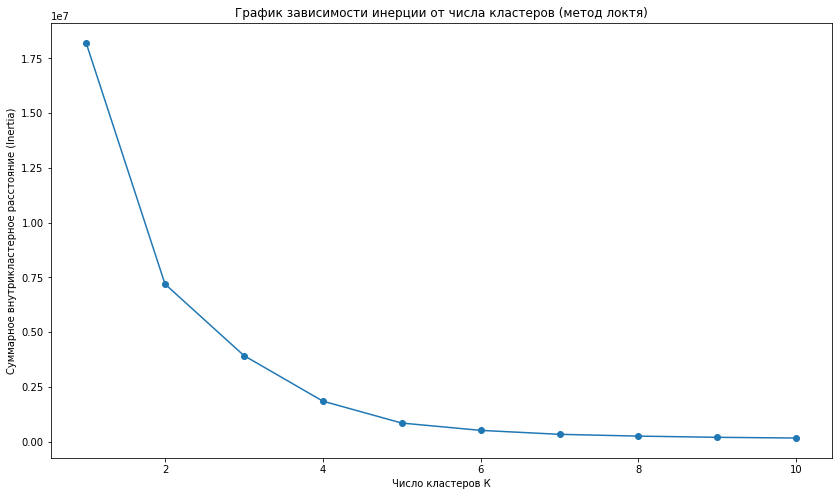

In [23]:
i = []

min_k = 1
max_k = 10

plt.figure(figsize = (14, 8))

for k in range (min_k, max_k + 1):
    km = KMeans(n_clusters = k)
    km.fit_transform(rest_id_filtered)
    i.append(km.inertia_)
    
plt.plot(range(min_k, max_k + 1), i, marker = 'o')
plt.xlabel('Число кластеров К')
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')
plt.title('График зависимости инерции от числа кластеров (метод локтя)')
plt.show()

### Промежуточный вывод
Локоть наблюдается при числе кластеров равном 2-4

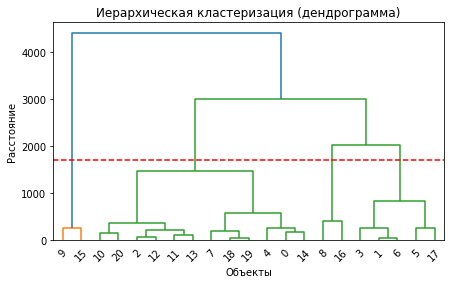

In [24]:
# Код ревьюера:
# Создадим таблицу связей:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(rest_id_filtered, method = 'ward')

# Визуализируем таблицу связей:
plt.figure(figsize=(7, 4))  
dendrogram(linked, orientation='top')

plt.axhline(y=1700, color='r', linestyle='--')  
plt.title("Иерархическая кластеризация (дендрограмма)")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")

plt.show()

**Задача 4.3.** Проведите кластеризацию, проанализируйте полученные результаты и рассчитайте средние значения по каждому кластеру.
    
После этого визуализируйте результаты, чтобы проследить зависимость признаков друг от друга. Постройте две визуализации, на которые нанесите все кластеры:
- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

После этого опишите каждый кластер в промежуточном выводе. 

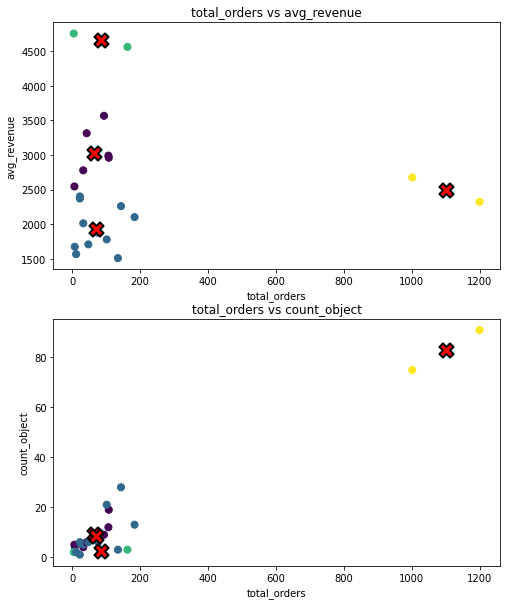

In [25]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
km = kmeans.fit_predict(rest_id_filtered)

centroids = kmeans.cluster_centers_

fig, axes = plt.subplots(2, 1, figsize = (8, 10))

axs = ['total_orders', 'avg_revenue', 'count_object']

for i, (x_idx, y_idx) in enumerate([[0, 1], [0, 2]]):
    x_label, y_label = axs[x_idx], axs[y_idx]
    
    axes[i].scatter(
        rest_id_filtered[x_label],
        rest_id_filtered[y_label],
        c = km,
        cmap = 'viridis',
        s = 50)
    
    axes[i].scatter(
        centroids[:, x_idx],
        centroids[:, y_idx],
        s = 200,
        c = 'red',
        edgecolors = 'black',
        linewidths = 2,
        marker = 'X')
    
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    axes[i].set_title(f'{x_label} vs {y_label}')
    
plt.show()

In [26]:
sorted_indices = np.argsort(kmeans.cluster_centers_[:, 1])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

centroids_df = pd.DataFrame(
    sorted_centroids,
    columns = ['Общее количество заказов', 'Средняя стоимость заказа', 'Общее число заказанных уникальных блюд'],
    index = [f'Кластер {i+1}' for i in range(kmeans.n_clusters)]
)

pd.options.display.float_format = '{:.2f}'.format

centroids_df.head(4)

,Общее количество заказов,Средняя стоимость заказа,Общее число заказанных уникальных блюд
Кластер 1,71.73,1931.62,8.64
Кластер 2,1100.00,2498.83,83.00
Кластер 3,65.33,3024.75,9.17
Кластер 4,84.00,4657.77,2.50


### Промежуточный вывод



- Кластер 1: рестораны со средним количеством заказов и числом блюд меньше 10 и с самой низкой средней стоимостью заказа
- Кластер 2: рестораны с наибольшим количеством заказов и количеством блюд и средней стоимостью заказа
- Кластер 3: рестораны со средним количеством заказов и количества блюд и средней стоимостью заказов около 3000
- Кластер 4: рестораны с наименьшим количеством блюд (3) и небольшим количеством заказов, но с самой высокой выручкой

---

## 5. Итоговый вывод и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты, которые, на ваш взгляд, помогут бизнесу улучшить продукт.

Выводы должны быть краткими и ёмкими, ведь их будут читать ваш заказчик, продуктовый менеджер и продуктовая команда.

1) Анализ Step-by-step воронки показал, что большая часть пользователей мобильной версии уходят на этапе подтверждения номера. Видимо последнее обновление, каснувшиеся алгоритма подтверждение, вызвало неудобство у пользователей. Предлагаю провести A/B тестирование различных алгоритмов подтверждения номера, чтобы выбрать оптимально удобный вариант или откатить приложение на старую версию подтверждения номера
2) Анализ RFM-сегментации: <br>
- Большинство клиентов имеют низкие значения частоты (F = 1 или 2), что указывает на их нерегулярность в покупках. Это может быть связано с низкой лояльностью или отсутствием стимулов для повторных покупок.
- Значения R (давность заказа) варьируются от 1 до 60, что говорит о разной активности клиентов. Клиенты с высокими значениями R (больше 30) требуют внимания для реактивации.
- Значения M (сумма заказов) распределены равномерно, но большинство клиентов имеют низкие или средние показатели. Это указывает на необходимость увеличения среднего чека или частоты покупок.

Рекомендации:
- Для пользователей, которые давно не заказывали используйте email-рассылки или push-уведомления с акциями и скидками для пробуждения в них повторного интереса
- Для пользователей с высокими показателями RFM предложите программы лояльности, например бонусы за частые покупки.
- Для клиентов с низкой суммой заказов, предложить акцию "купи на сумму N и получи подарок"

3) Анализ результатов K-Means кластеризации: 
- Кластер 1: рестораны с наименьшим количеством заказов (66.33), средней стоимостью заказа (1982.65) и числом уникальных блюд (8.33). Это может быть сегмент небольших заведений с ограниченным меню.

- Кластер 2: рестораны с наибольшим количеством заказов (1100.00), средней стоимостью заказа (2498.83) и числом уникальных блюд (83.00). Это крупные заведения с разнообразным меню.

- Кластер 3: рестораны с умеренным количеством заказов (77.00), высокой средней стоимостью заказа (3120.90) и средним числом уникальных блюд (10.00). Возможно, это премиум-сегмент.

- Кластер 4: рестораны с небольшим количеством заказов (84.00), самой высокой средней стоимостью заказа (4657.77) и минимальным числом уникальных блюд (2.50). 

Рекомендации:

- Рестораны, относящиеся к Кластеру 2 кажутся наиболее перспективными
- Другим ресторанам, особенно ресторанам, относящихся к Кластеру 1 и Кластеру 4 обратить внимание на расширении ассортимента, так как есть закономерность между числом заказов и количеством блюд в ресторане